<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Constants" data-toc-modified-id="Imports-and-Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Constants</a></span></li><li><span><a href="#Inspecting-a-single-TFRecord-file" data-toc-modified-id="Inspecting-a-single-TFRecord-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inspecting a single TFRecord file</a></span></li><li><span><a href="#Basic-band-analysis-of-a-single-image" data-toc-modified-id="Basic-band-analysis-of-a-single-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic band analysis of a single image</a></span></li><li><span><a href="#Band-Analysis-of-All-Images" data-toc-modified-id="Band-Analysis-of-All-Images-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Band Analysis of All Images</a></span></li><li><span><a href="#Plot-images-with-most-bad-pixels" data-toc-modified-id="Plot-images-with-most-bad-pixels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot images with most bad pixels</a></span></li></ul></div>

**Analysis of DHS dataset**
- Calculates statistics about each image band in the DHS dataset
- Plots the images with the greatest number of bad pixels
- The means and standard deviations for the DHS dataset in `batchers/dataset_constants.py` come from the output of this notebook.

Prerequisite:
- Run `preprocessing/process_tfrecords_dhs.ipynb`.

## Imports and Constants

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pprint import pprint
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')
from batchers import batcher, dataset_constants
from preprocessing.helper import (
    get_first_feature_map,
    get_feature_types,
    print_scalar_values,
    analyze_tfrecord_batch,
    print_analysis_results)
from utils.plot import plot_image_by_band 

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

DATASET_NAME = '2009-17'
BAND_ORDER = ['BLUE', 'GREEN', 'RED', 'SWIR1', 'TEMP1', 'SWIR2', 'NIR', 'NIGHTLIGHTS']
BAND_ORDER_NLSPLIT = ['BLUE', 'GREEN', 'RED', 'SWIR1', 'TEMP1', 'SWIR2', 'NIR', 'DMSP', 'VIIRS']

MEANS = dataset_constants.MEANS_DICT[DATASET_NAME]
STD_DEVS = dataset_constants.STD_DEVS_DICT[DATASET_NAME]

print('Means:')
pprint(MEANS)
print()

print('Std Devs:')
pprint(STD_DEVS)

Means:
{'BLUE': 0.059183,
 'DMSP': 4.005496,
 'GREEN': 0.088619,
 'NIR': 0.253074,
 'RED': 0.104145,
 'SWIR1': 0.246874,
 'SWIR2': 0.168728,
 'TEMP1': 299.078023,
 'VIIRS': 1.096089}

Std Devs:
{'BLUE': 0.022926,
 'DMSP': 23.038301,
 'GREEN': 0.03188,
 'NIR': 0.058973,
 'RED': 0.051458,
 'SWIR1': 0.088857,
 'SWIR2': 0.08324,
 'TEMP1': 4.300303,
 'VIIRS': 4.786354}


In [4]:
ALL_TFRECORD_PATHS = batcher.get_tfrecord_paths(DATASET_NAME, split='all')
print('Number of records:', len(ALL_TFRECORD_PATHS))
pprint(ALL_TFRECORD_PATHS[0:5])

Number of records: 19669
['/atlas/u/chrisyeh/poverty_data/lxv3_water/angola_2011/0.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lxv3_water/angola_2011/1.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lxv3_water/angola_2011/10.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lxv3_water/angola_2011/100.tfrecord.gz',
 '/atlas/u/chrisyeh/poverty_data/lxv3_water/angola_2011/101.tfrecord.gz']


## Inspecting a single TFRecord file

In [5]:
tfrecord_path = ALL_TFRECORD_PATHS[0]
feature_map = get_first_feature_map(tfrecord_path)
feature_types = get_feature_types(feature_map)

print(f'TFRecord path: {tfrecord_path}')
print('Features and types:')
pprint(feature_types)
print()
print_scalar_values(feature_map)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
TFRecord path: /atlas/u/chrisyeh/poverty_data/lxv3_water/angola_2011/0.tfrecord.gz
Features and types:
{'ASP': ('float_list', (65025,)),
 'BLUE': ('float_list', (65025,)),
 'ELEV': ('float_list', (65025,)),
 'GREEN': ('float_list', (65025,)),
 'LAT': ('float_list', (65025,)),
 'LON': ('float_list', (65025,)),
 'NIGHTLIGHTS': ('float_list', (65025,)),
 'NIR': ('float_list', (65025,)),
 'RED': ('float_list', (65025,)),
 'SLO': ('float_list', (65025,)),
 'SWIR1': ('float_list', (65025,)),
 'SWIR2': ('float_list', (65025,)),
 'TEMP1': ('float_list', (65025,)),
 'cluster_index': ('float_list', (1,)),
 'country': ('bytes_list', (1,)),
 'households': ('float_list', (1,)),
 'indx': ('float_list', (1,)),
 'lat': ('float_list', (1,)),
 'lon': ('float_list', (1,)),
 'system:index': ('bytes_list', (1,)),
 'urban_rural': ('float_list', (1,)),
 'wealth': ('float_list', (1,)),
 'wealthpooled': ('float_list', (1,)),
 

In [6]:
tfrecord_path = ALL_TFRECORD_PATHS[1000]
feature_map = get_first_feature_map(tfrecord_path)
feature_types = get_feature_types(feature_map)

print(f'TFRecord path: {tfrecord_path}')
print('Features and types:')
pprint(feature_types)
print()
print_scalar_values(feature_map)

TFRecord path: /atlas/u/chrisyeh/poverty_data/lxv3_water/benin_2012/229.tfrecord.gz
Features and types:
{'ASP': ('float_list', (65025,)),
 'BLUE': ('float_list', (65025,)),
 'ELEV': ('float_list', (65025,)),
 'GREEN': ('float_list', (65025,)),
 'LAT': ('float_list', (65025,)),
 'LON': ('float_list', (65025,)),
 'NIGHTLIGHTS': ('float_list', (65025,)),
 'NIR': ('float_list', (65025,)),
 'RED': ('float_list', (65025,)),
 'SLO': ('float_list', (65025,)),
 'SWIR1': ('float_list', (65025,)),
 'SWIR2': ('float_list', (65025,)),
 'TEMP1': ('float_list', (65025,)),
 'cluster_index': ('float_list', (1,)),
 'country': ('bytes_list', (1,)),
 'households': ('float_list', (1,)),
 'indx': ('float_list', (1,)),
 'lat': ('float_list', (1,)),
 'lon': ('float_list', (1,)),
 'system:index': ('bytes_list', (1,)),
 'urban_rural': ('float_list', (1,)),
 'wealth': ('float_list', (1,)),
 'wealthpooled': ('float_list', (1,)),
 'wealthpooled5country': ('float_list', (1,)),
 'year': ('float_list', (1,))}

cluste

Explanation of each field

- `ASP`: float, (65025,), aspect
- `BLUE`: float, (65025,), blue
- `ELEV`: float, (65025,), elevation
- `GREEN`: float, (65025,), green
- `LAT`: float, (65025,), latitude
- `LON`: float, (65025,), longitude
- `NIGHTLIGHTS`: float, (65025,), nightlights (VIIRS for 2012+, DMSP before 2012)
- `NIR`: float, (65025,), near infrared
- `RED`: float, (65025,), red
- `SLO`: float, (65025,), slope
- `SWIR1`: float, (65025,), short-wave infrared 1
- `SWIR2`: float, (65025,), short-wave infrared 2
- `TEMP1`: float, (65025,), temperature
- `cluster_index`: float, (1,), cluster index
- `country`: float, (1,), empty
- `households`: float, (1,), number of households in this cluster
- `indx`: float, (1,), unique index for the given record within the TFRecord file
- `lat`: float, (1,), center latitude
- `lon`: float, (1,), center longitude
- `system:index`: bytes, (1,), ??
- `urban_rural`: float, (1,), urban/rural mask, 1 for urban, 0 for rural
- `wealth`: float, (1,)
- `wealthpooled`: float, (1,)
- `wealthpooled5country`: float, (1,)
- `year`: float, (1,), year of survey

Loc: (6.665214, 2.150123), benin, 2012


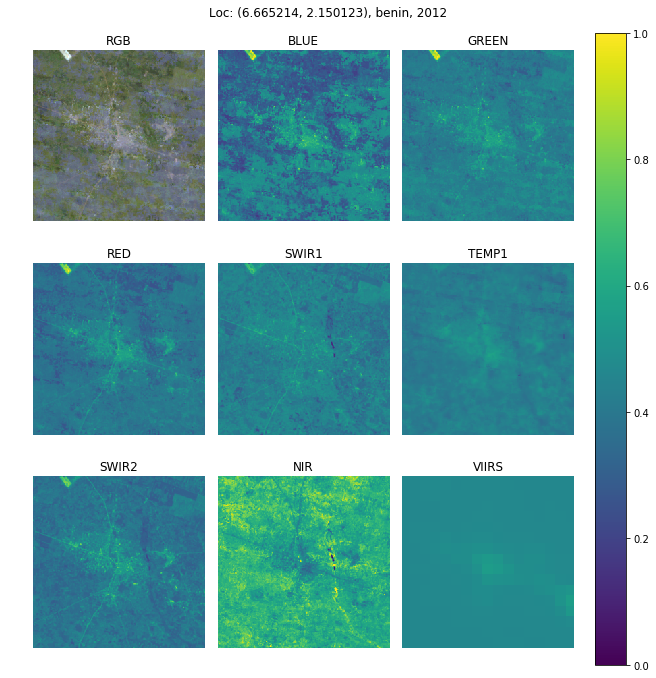

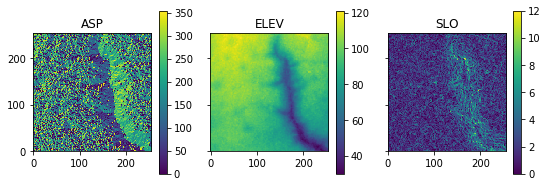

In [7]:
def year_to_nltype(year):
    return 'DMSP' if year < 2012 else 'VIIRS'

def band_keys_for_year(band_keys, year):
    '''
    Args
    - band_keys: list of str, including 'NIGHTLIGHTS'
    - year: numeric

    Returns
    - new_band_keys: copy of band_keys with 'NIGHTLIGHTS' replaced by 'DMSP' or 'VIIRS'
    '''
    new_band_keys = list(band_keys) # make a local copy
    new_band_keys[band_keys.index('NIGHTLIGHTS')] = year_to_nltype(year)
    return new_band_keys

def plot_single_img(feature_map):
    lat = np.float32(feature_map['lat'].float_list.value[0])
    lon = np.float32(feature_map['lon'].float_list.value[0])
    country = feature_map['country'].bytes_list.value[0].decode()
    year = int(feature_map['year'].float_list.value[0])
    fig_title = f'Loc: ({lat:.6f}, {lon:.6f}), {country}, {year}'
    print(fig_title)

    # choose 'DMSP' or 'VIIRS' for nightlights band name based on year
    band_keys_nl = band_keys_for_year(BAND_ORDER, year)

    img_normalized = []
    for b_idx, b_name in enumerate(BAND_ORDER):
        band = np.asarray(feature_map[b_name].float_list.value, dtype=np.float32).reshape(255, 255)
        b = band_keys_nl[b_idx]
        band = (band - MEANS[b]) / STD_DEVS[b]
        img_normalized.append(band)
    img_normalized = np.stack(img_normalized, axis=2)

    plot_image_by_band(img=img_normalized, band_order=band_keys_nl, nrows=3, title=fig_title,
                       rgb='add', colorbar=True)

    LANDSCAPE_KEYS = ['ASP', 'ELEV', 'SLO']
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=[9, 3])
    for b, band_name in enumerate(LANDSCAPE_KEYS):
        ax = axs[b]
        band = np.asarray(feature_map[band_name].float_list.value, dtype=np.float32).reshape(255, 255)
        vmin, vmax = np.min(band), np.max(band)
        im = ax.imshow(band, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
        ax.set_title(band_name)
        fig.colorbar(im, orientation='vertical', ax=ax)

plot_single_img(feature_map)

## Basic band analysis of a single image

Single Image Band Statistics
BLUE	- min: 0.0104	 max: 0.1406	 avg: 0.0455047	 std: 0.0140293	 nz: 0
GREEN	- min: 0.0422	 max: 0.1984	 avg: 0.0766838	 std: 0.0100611	 nz: 0
RED	- min: 0.0244	 max: 0.25755	 avg: 0.071888	 std: 0.0179359	 nz: 0
SWIR1	- min: 0.03755	 max: 0.39515	 avg: 0.211789	 std: 0.0258433	 nz: 0
TEMP1	- min: 291.7	 max: 301.05	 avg: 297.264	 std: 0.829726	 nz: 0
SWIR2	- min: 0.02285	 max: 0.33025	 avg: 0.117563	 std: 0.0292775	 nz: 0
NIR	- min: 0.06925	 max: 0.49045	 avg: 0.29908	 std: 0.0291178	 nz: 0
VIIRS	- min: 0.0137232	 max: 2.67033	 avg: 0.318328	 std: 0.427488	 nz: 0
Number of all-0 pixels: 0

Single Image Band Statistics - Ignoring 0 values
BLUE	- min: 0.0104	 max: 0.1406	 avg: 0.0455047	 std: 0.0140293
GREEN	- min: 0.0422	 max: 0.1984	 avg: 0.0766838	 std: 0.0100611
RED	- min: 0.0244	 max: 0.25755	 avg: 0.071888	 std: 0.0179359
SWIR1	- min: 0.03755	 max: 0.39515	 avg: 0.211789	 std: 0.0258433
TEMP1	- min: 291.7	 max: 301.05	 avg: 297.264	 std: 0.829726
SWIR2

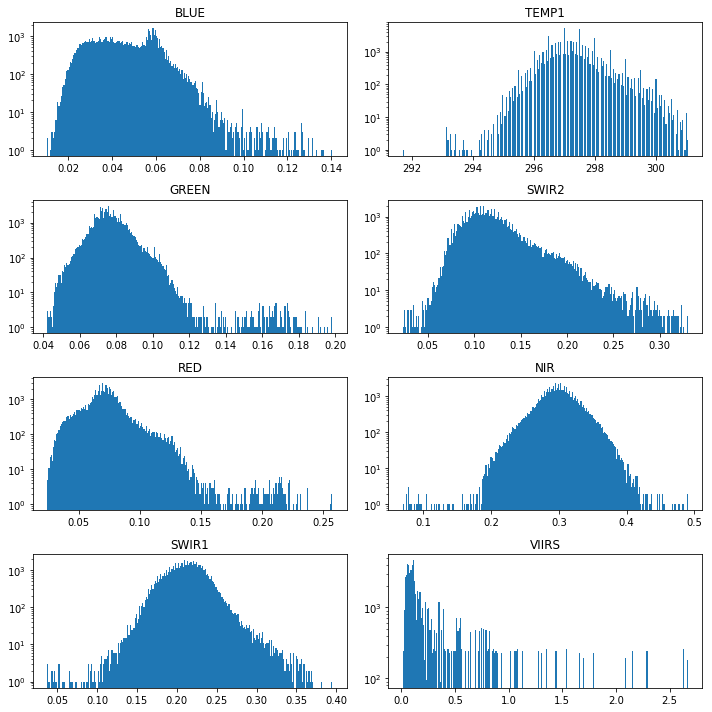

In [8]:
def single_img_band_analysis(feature_map):
    '''perform basic band analysis'''
    nbands = len(BAND_ORDER)
    nrows = int(np.ceil(nbands / 2.0))
    fig, axs = plt.subplots(nrows, 2, figsize=[10, 10])

    img = np.stack([
        np.asarray(feature_map[band].float_list.value).reshape(255, 255)
        for band in BAND_ORDER
    ], axis=2)

    # choose 'DMSP' or 'VIIRS' for nightlights band name based on year
    year = int(feature_map['year'].float_list.value[0])
    band_keys = band_keys_for_year(BAND_ORDER, year)

    print('Single Image Band Statistics')
    mins = np.min(img, axis=(0,1))
    maxs = np.max(img, axis=(0,1))
    means = np.mean(img, axis=(0,1))
    stds = np.std(img, axis=(0,1))
    nzs = np.sum(img == 0, axis=(0,1)) # number of zeros
    for i, band in enumerate(band_keys):
        print('{}\t- min: {:0.6g}\t max: {:0.6g}\t avg: {:0.6g}\t std: {:0.6g}\t nz: {}'.format(
            band, mins[i], maxs[i], means[i], stds[i], nzs[i]))
        ax = axs[i % nrows, i // nrows]
        ax.hist(img[:,:,i].flatten(), bins=255)
        ax.set_title(band)
        ax.set_yscale('log')

    # number of pixels that are entirely zero
    nz_pixels = np.sum(np.all(img == 0, axis=2))
    print('Number of all-0 pixels:', nz_pixels)

    print('')
    print('Single Image Band Statistics - Ignoring 0 values')
    for i, band in enumerate(band_keys):
        b = img[:,:,i]
        bnz = b[b > 0]
        if len(bnz) == 0:
            print(f'Band {band} is all 0')
        else:
            print('{}\t- min: {:0.6g}\t max: {:0.6g}\t avg: {:0.6g}\t std: {:0.6g}'.format(
                band, np.min(bnz), np.max(bnz), np.mean(bnz), np.std(bnz)))

    fig.tight_layout()
    plt.show()

single_img_band_analysis(feature_map)

## Band Analysis of All Images

Calculate the mean and standard deviation of each band across the entire dataset (the train, val, and test sets all merged together). This makes sense because in an actual test scenario we would have the test images, so we could include it in the statistics calculations.

We do this for 2 cases:
1. the images are read as-is
2. negative values are filled in with 0

In [9]:
iter_init, batch_op = batcher.Batcher(
    tfrecord_files=ALL_TFRECORD_PATHS,
    dataset=DATASET_NAME,
    batch_size=128,
    ls_bands='ms',
    nl_band='merge',
    label_name='wealthpooled',
    shuffle=False,
    augment=False,
    negatives=None,
    normalize=False).get_batch()
stats, k_worst = analyze_tfrecord_batch(
    iter_init, batch_op, total_num_images=len(ALL_TFRECORD_PATHS), nbands=len(BAND_ORDER_NLSPLIT), k=20)

Instructions for updating:
Colocations handled automatically by placer.
Finished. Processed 19669 images.
Time per batch - mean: 7.315s, std: 1.115s
Time to process each batch - mean: 3.085s, std: 0.319s
Total time: 1602.865s, Num batches: 154


In [10]:
with np.printoptions(precision=6):
    pprint({k: v for k, v in stats.items() if k != 'num_good_pixels'})

{'maxs': array([2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00,
       2.000000e+00, 3.163000e+02, 2.000000e+00, 1.178694e+03,
       2.521047e+03]),
 'mins': array([-1.126000e-01, -1.000000e-04, -2.440000e-02, -2.000000e-03,
       -3.100000e-03,  0.000000e+00, -6.300000e-03,  0.000000e+00,
       -9.602804e-02]),
 'mins_goodpx': array([-1.126000e-01, -1.000000e-04, -2.440000e-02, -2.000000e-03,
       -3.100000e-03,  0.000000e+00, -6.300000e-03,  0.000000e+00,
       -9.602804e-02]),
 'mins_nz': array([1.000000e-04, 4.100000e-03, 1.000000e-04, 6.500000e-04,
       7.500000e-04, 2.734500e+02, 6.250000e-03, 2.935504e+00,
       8.533243e-08]),
 'nz_pixels': array([986874431, 986874508, 986874507, 986874504, 986874502, 986874509,
       986874504, 106119626, 589706169]),
 'sum_sqs': array([3.975483e+06, 8.753525e+06, 1.331745e+07, 6.794123e+07,
       3.493477e+07, 8.829485e+13, 6.664015e+07, 5.396484e+11,
       2.379493e+10]),
 'sums': array([5.840806e+07, 8.745885e+07, 1.0278

In [11]:
num_good_pixels = stats['num_good_pixels']
images_count = len(num_good_pixels)
print('num total pixels:', images_count*(224**2))
print('num total good pixels:', np.sum(num_good_pixels))
print('mean number of non-0 pixels in each band:', np.mean(stats['nz_pixels']))

num total pixels: 986911744
num total good pixels: 986907873
mean number of non-0 pixels in each band: 844883028.8888888


In [12]:
means, stds = print_analysis_results(stats=stats, band_order=BAND_ORDER_NLSPLIT)

Statistics including bad pixels
Band BLUE     - mean:   0.059183, std:  0.022926, min:     -0.1126, max:    2.000000
Band GREEN    - mean:   0.088619, std:  0.031880, min:     -0.0001, max:    2.000000
Band RED      - mean:   0.104145, std:  0.051459, min:     -0.0244, max:    2.000000
Band SWIR1    - mean:   0.246873, std:  0.088858, min:      -0.002, max:    2.000000
Band TEMP1    - mean:   0.168728, std:  0.083241, min:     -0.0031, max:    2.000000
Band SWIR2    - mean: 299.076850, std:  4.340896, min:           0, max:  316.299988
Band NIR      - mean:   0.253073, std:  0.058975, min:     -0.0063, max:    2.000000
Band DMSP     - mean:   4.005480, std: 23.038257, min:           0, max: 1178.693970
Band VIIRS    - mean:   1.096085, std:  4.786345, min:   -0.096028, max: 2521.046875

Statistics ignoring any 0s and negative values
Band BLUE     - mean:   0.059185, std:  0.022924, min:      0.0001, max:    2.000000, mean_nz: 50174.101562
Band GREEN    - mean:   0.088622, std:  0.03187

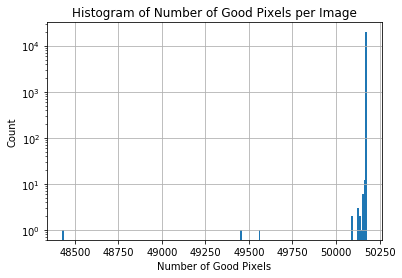

In [13]:
def hist_num_good_pixels(num_good_pixels):
    fig, ax = plt.subplots(1, 1)
    ax.hist(num_good_pixels, bins=200)
    ax.set_yscale('log')
    ax.set_xlabel('Number of Good Pixels')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Number of Good Pixels per Image')
    ax.grid(True)
    plt.show()

hist_num_good_pixels(num_good_pixels)

## Plot images with most bad pixels

In [30]:
def plot_k_top(k_top, value_str, means, stds, negate_value=False):
    '''
    Args
    - k_top: list of length k, elements are (value, (label, image, loc, year))
    - value_str: str
    - means: dict
    - stds: dict
    - negate_value: bool
    '''
    values, datas = zip(*k_top)
    values = np.asarray(values)
    if negate_value:
        values = -values

    pprint(values)
    labels, years, locs, images = zip(*datas)

    for i, img in enumerate(images):
        loc, label, value, year = locs[i], labels[i], values[i], years[i]
        band_order_nl = band_keys_for_year(BAND_ORDER, year)
        img_normalized = np.zeros_like(img)
        for b, band_name in enumerate(band_order_nl):
            img_normalized[:,:,b] = (img[:,:,b] - means[band_name]) / stds[band_name]
        fig_title = 'loc: ({:0.6f}, {:0.6f})   label: {:0.6f}   {}: {:0.6g}'.format(
            loc[0], loc[1], label, value_str, value)
        plot_image_by_band(img_normalized, band_order=band_order_nl, nrows=1, title=fig_title, rgb='merge')

array([50162, 50161, 50160, 50156, 50156, 50156, 50154, 50154, 50151,
       50144, 50138, 50137, 50128, 50127, 50126, 50090, 50090, 49562,
       49452, 48428])


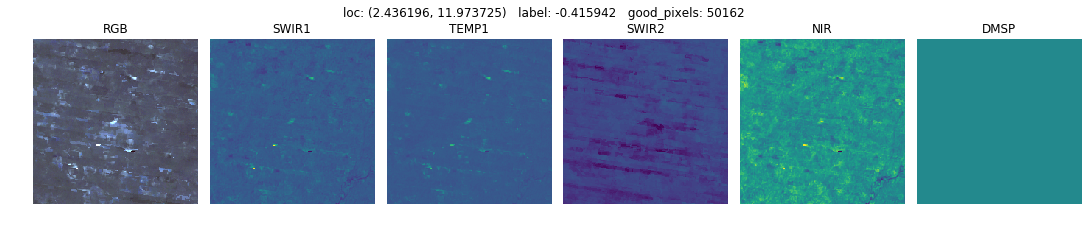

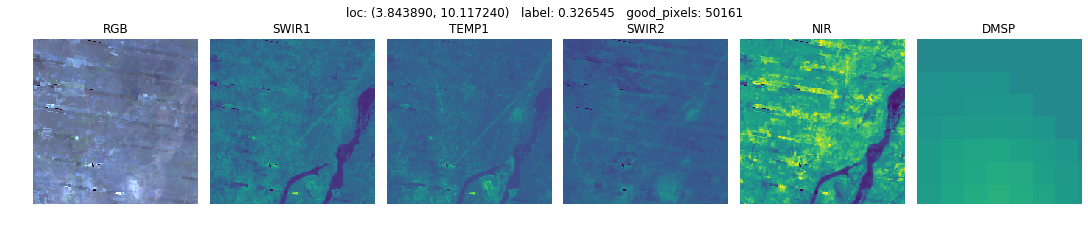

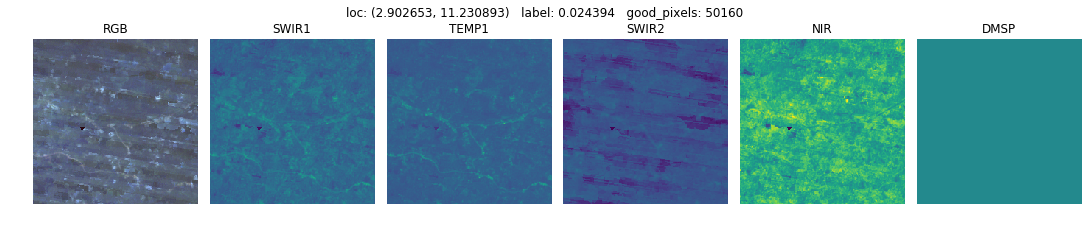

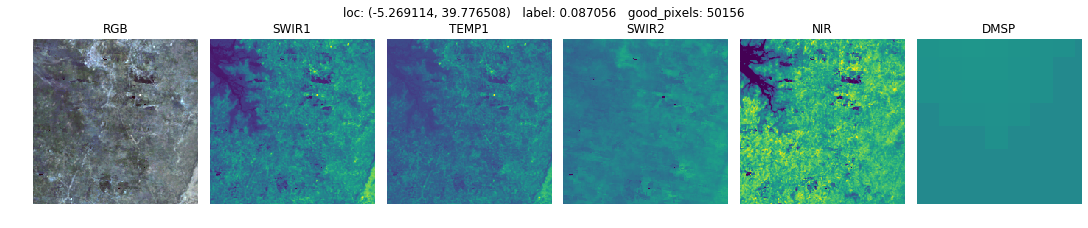

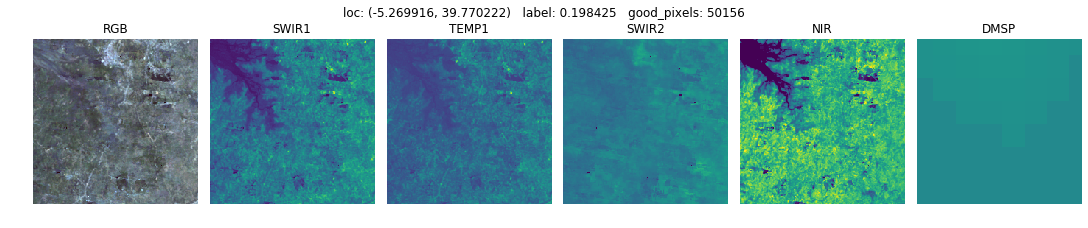

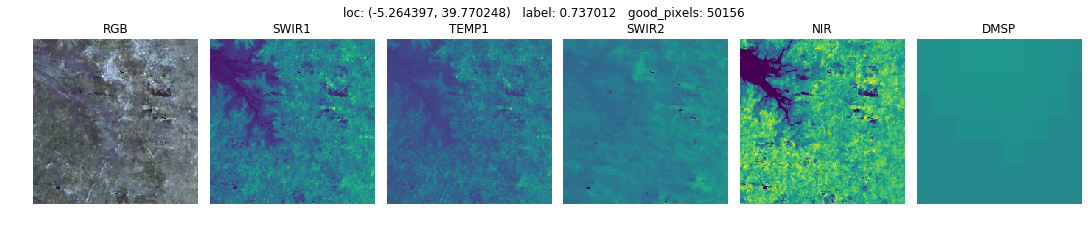

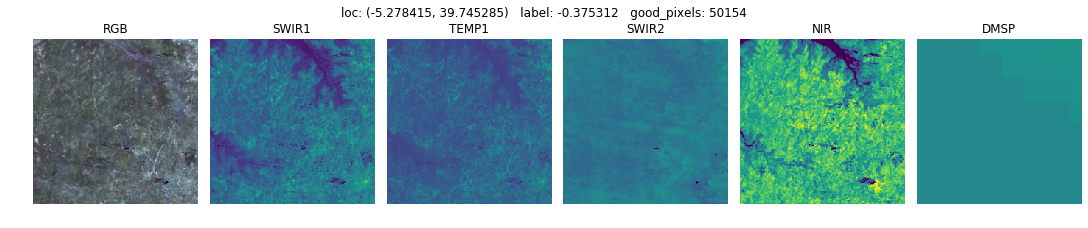

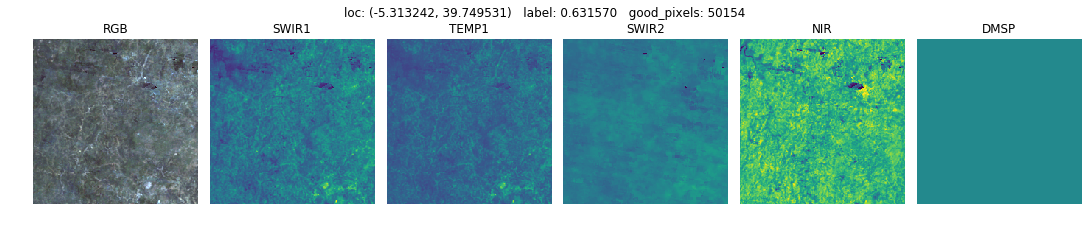

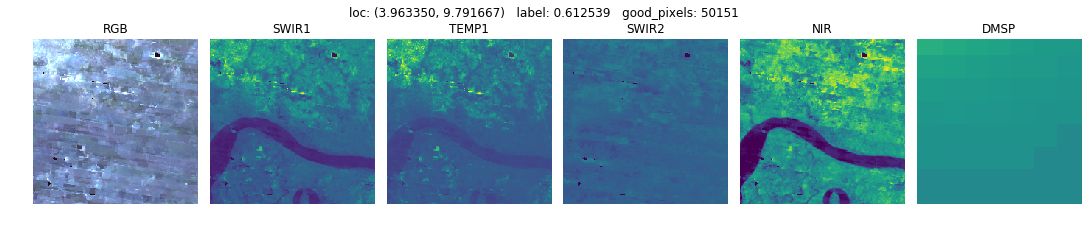

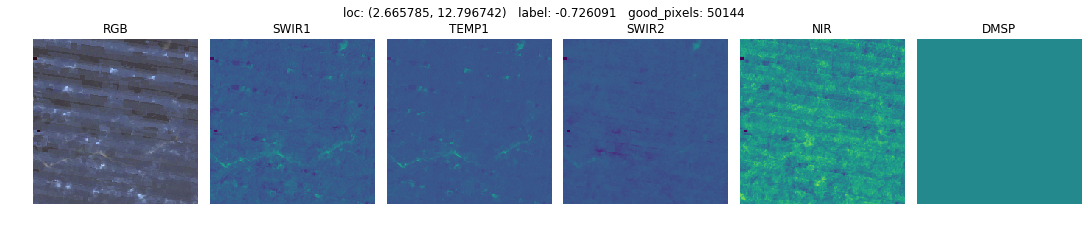

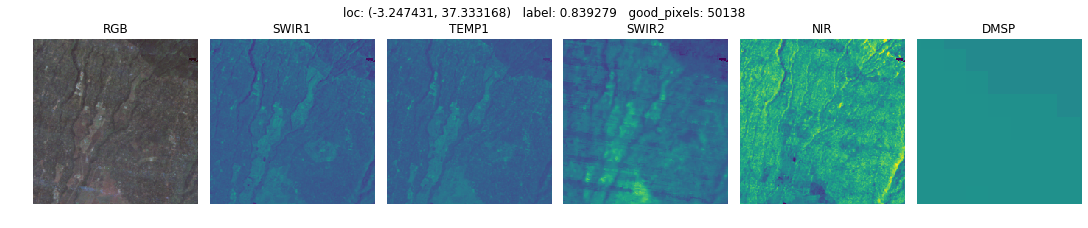

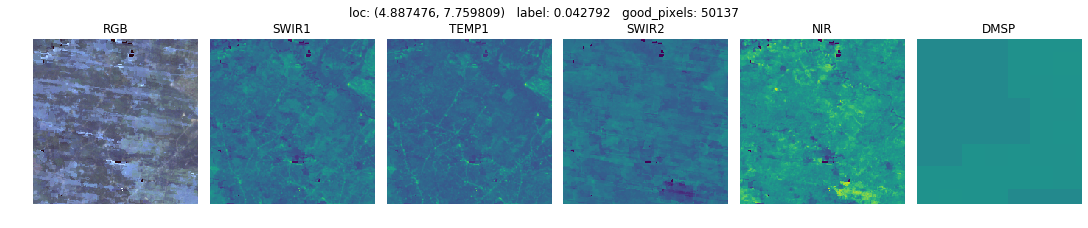

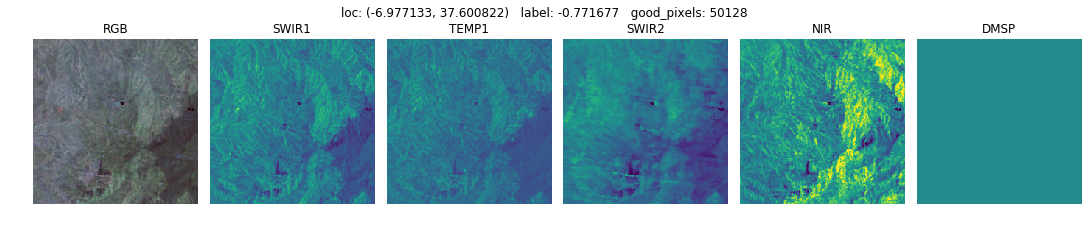

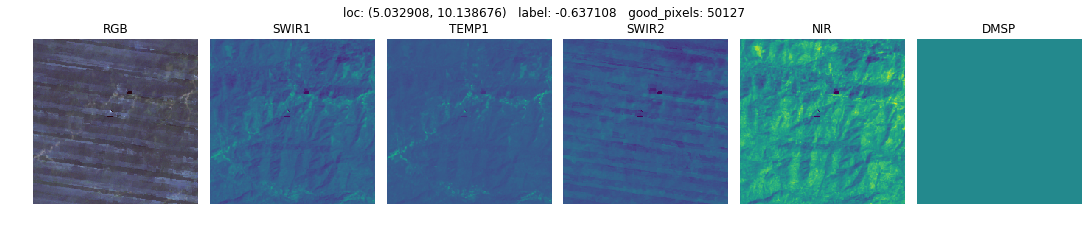

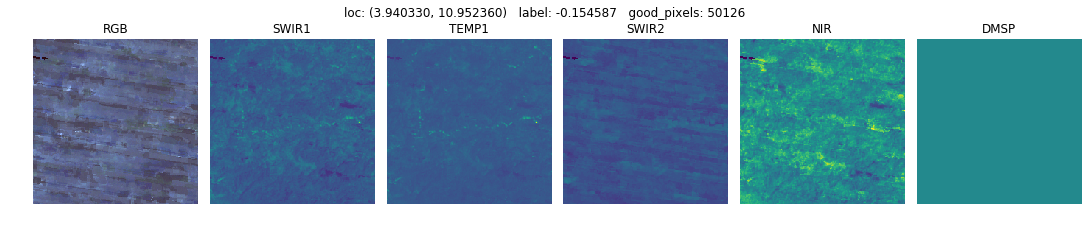

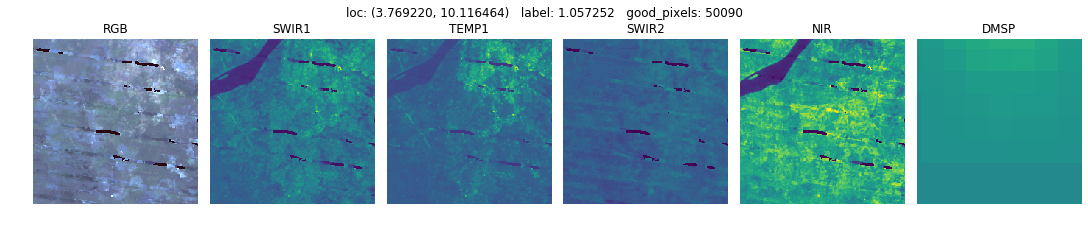

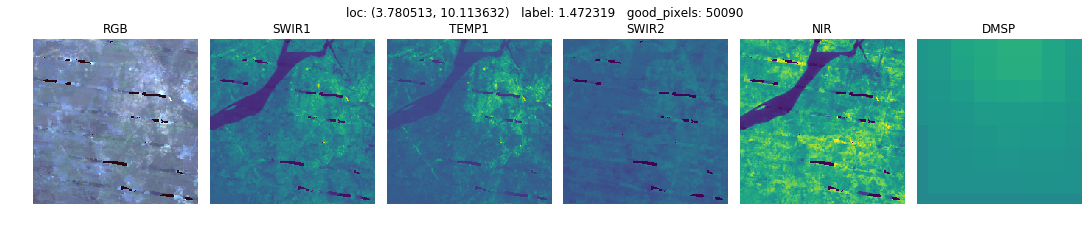

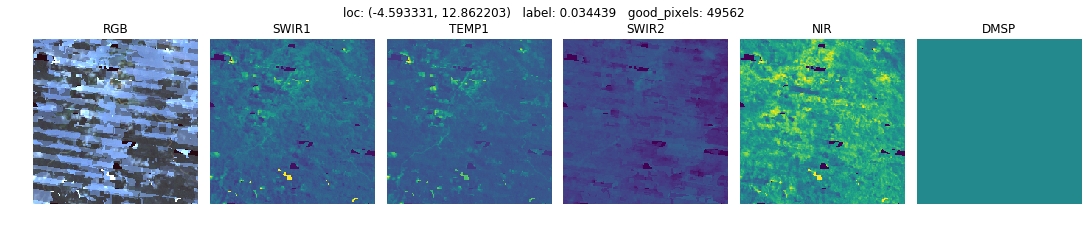

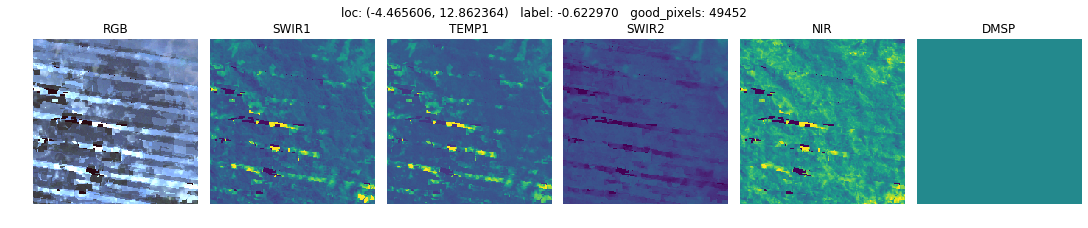

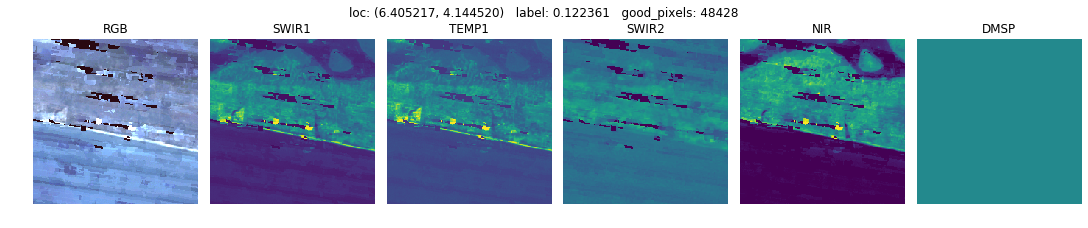

In [31]:
plot_k_top(k_worst, value_str='good_pixels', means=means, stds=stds, negate_value=True)